## Unitable

When table detection works this yields perfect results for incredibly challenging tables. Unfortunately we still need to use table-transformers for bounding box detection and it's performance leaves something to be desired.

I spoke with the UniTable team and they might implement this. Their challenge lies in PubTables-1M having poor groundtruth annotations.

If you're aware of a better table detection model, please let us know - theoretically this task should be significantly easier than content-extraction.

## Notebook

This notebook demonstrates using unitable to extract some challenging tables we've seen. This is meant to really push the limits of the model.

You will need to use git LFS to download the sample data.

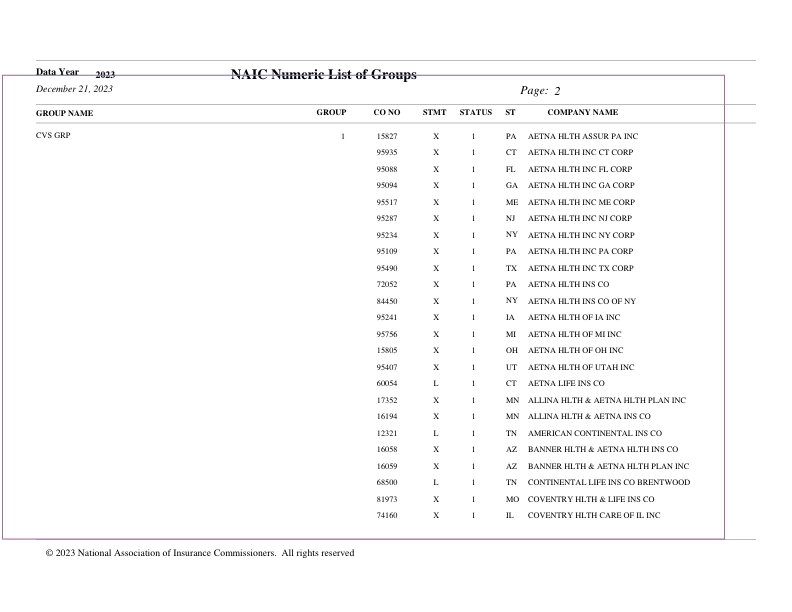

Could not find tables on ../evals/data/tables/H3_Scorecard_Mock.pdf


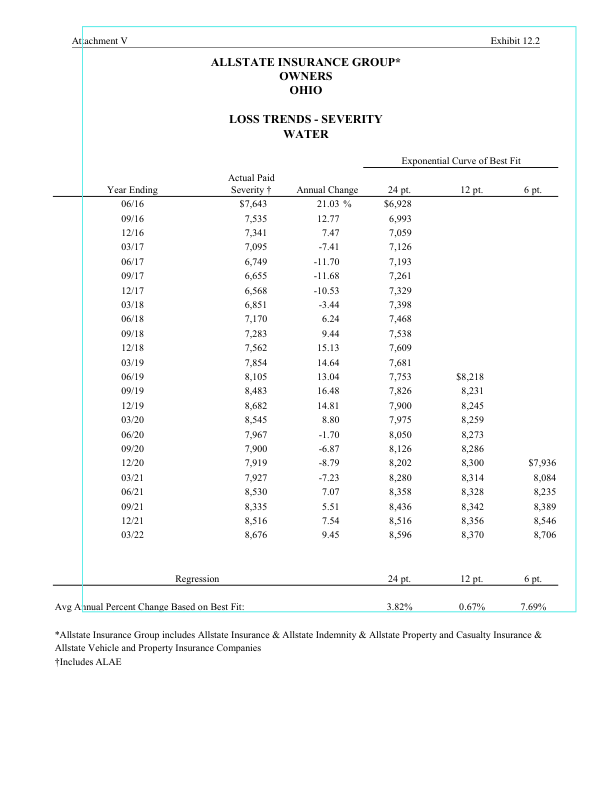

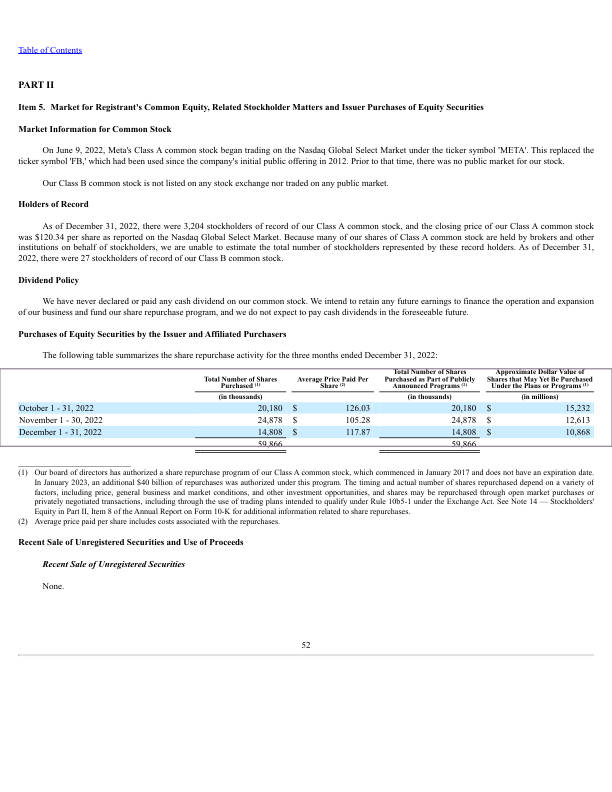

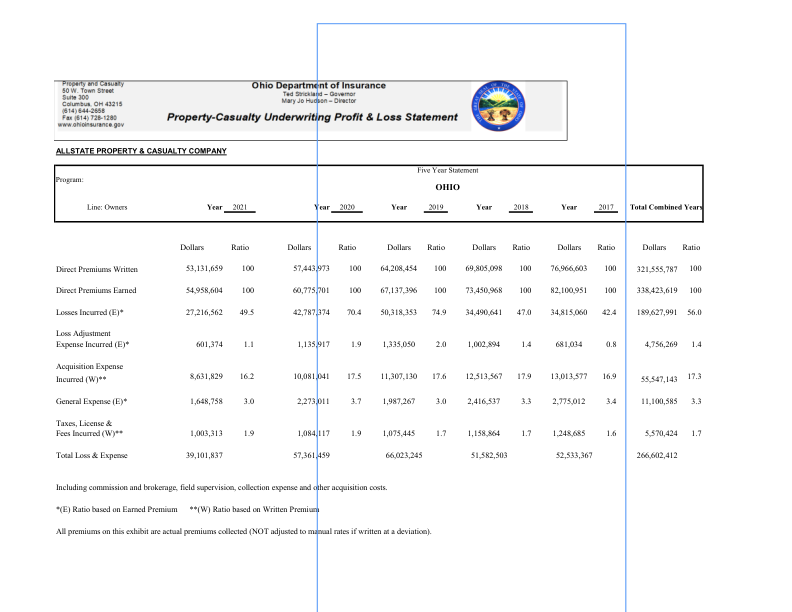

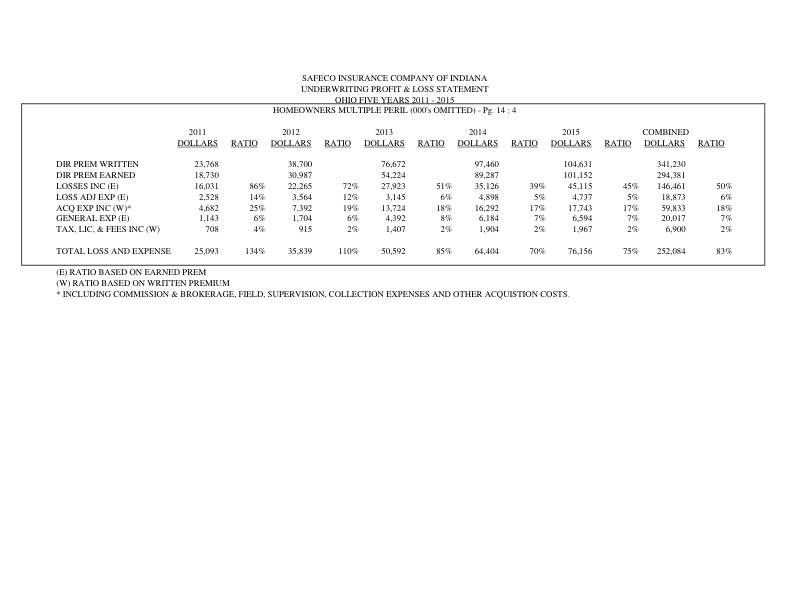

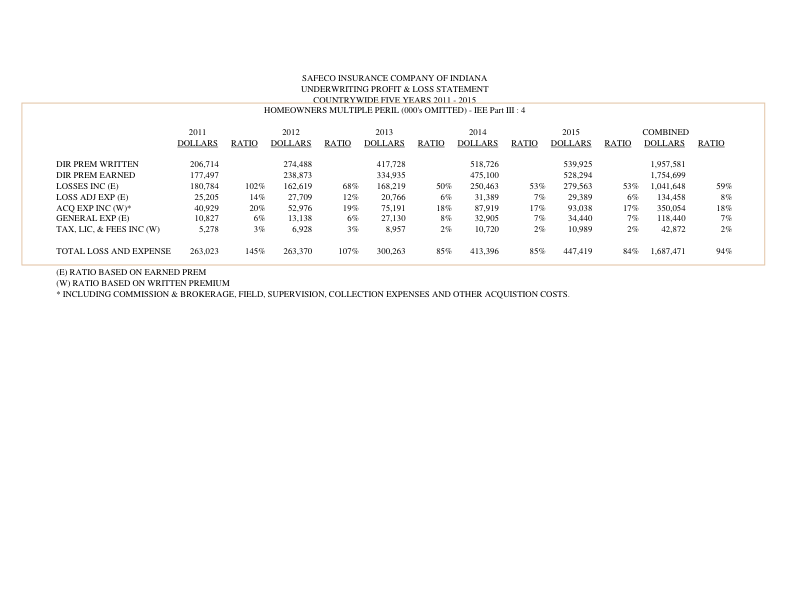

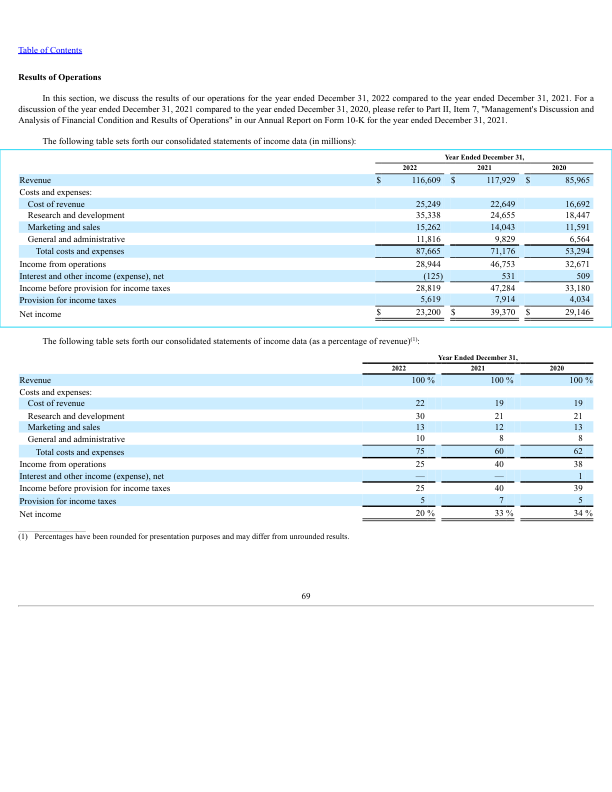

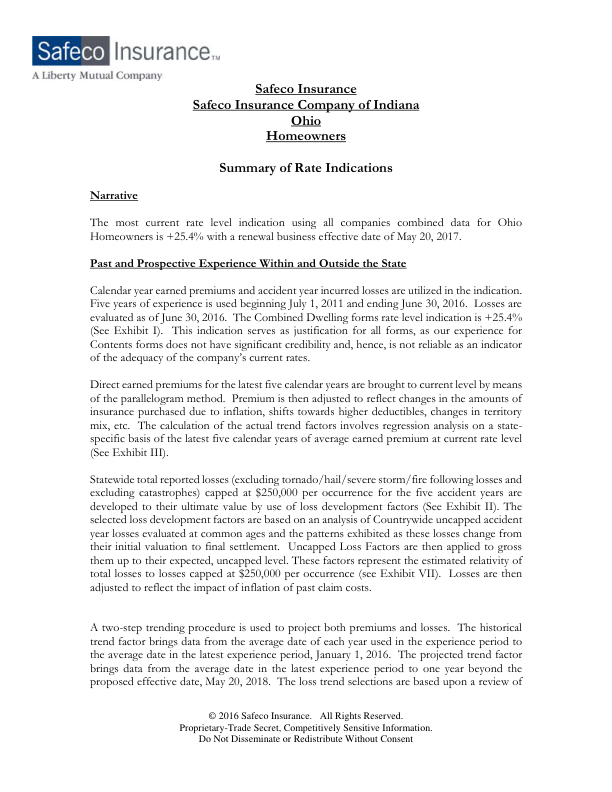

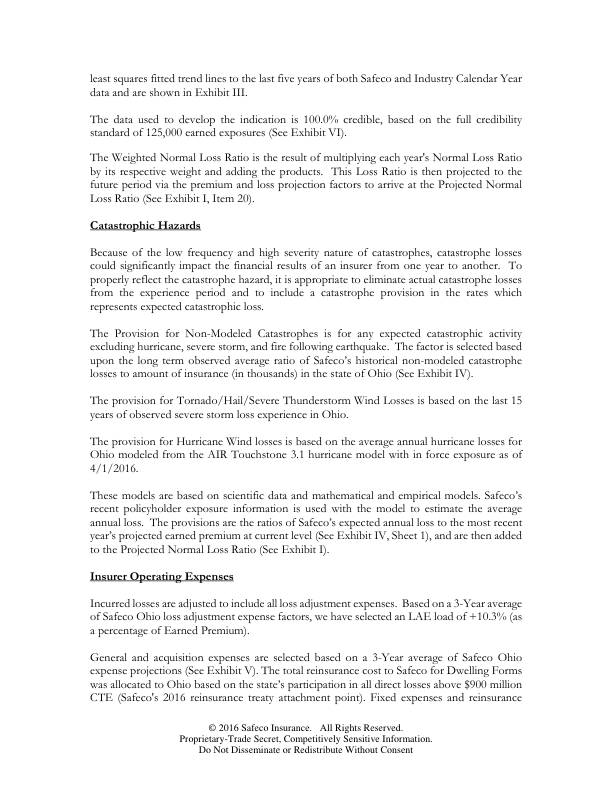

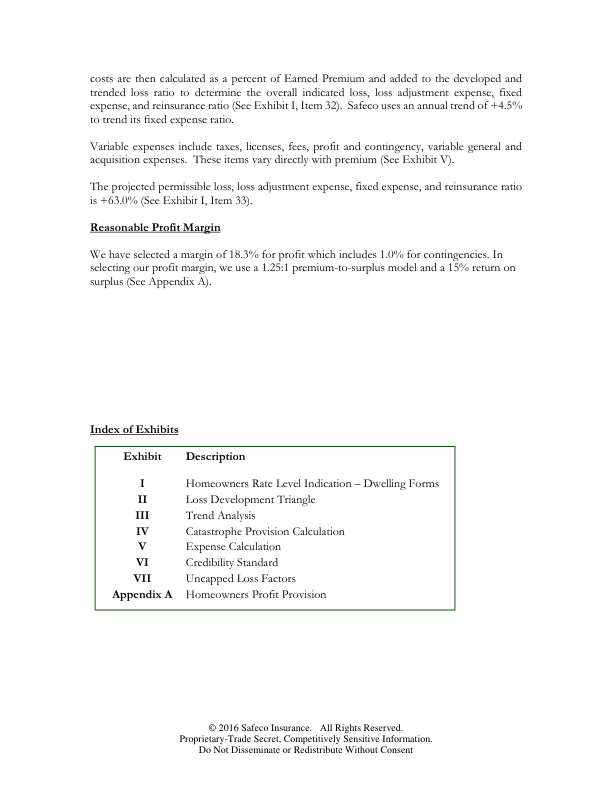

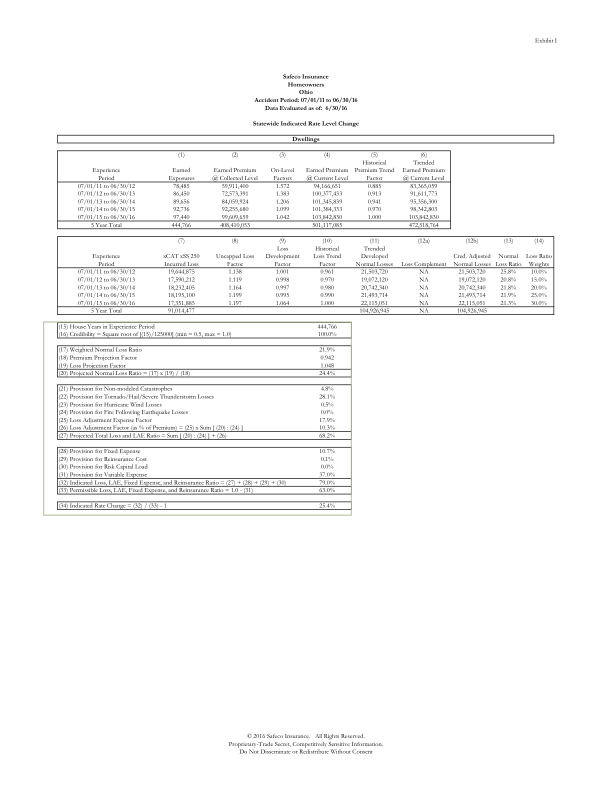

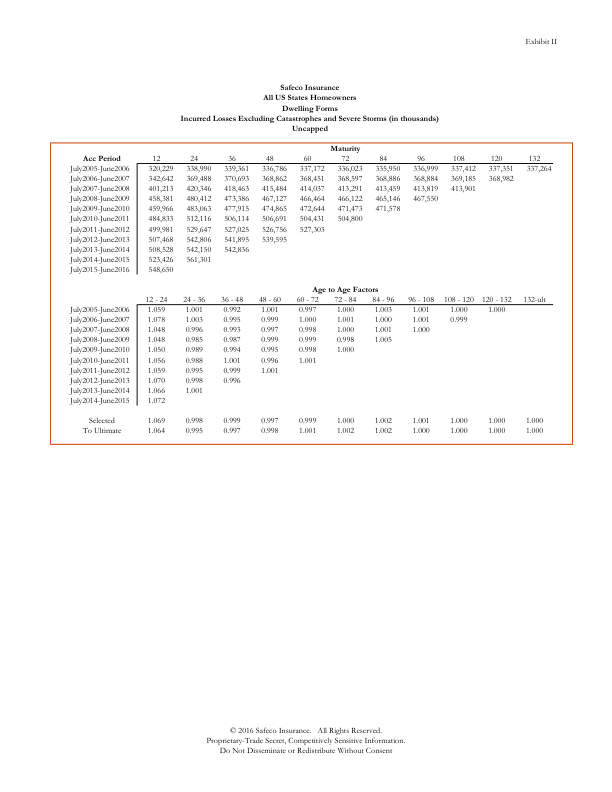

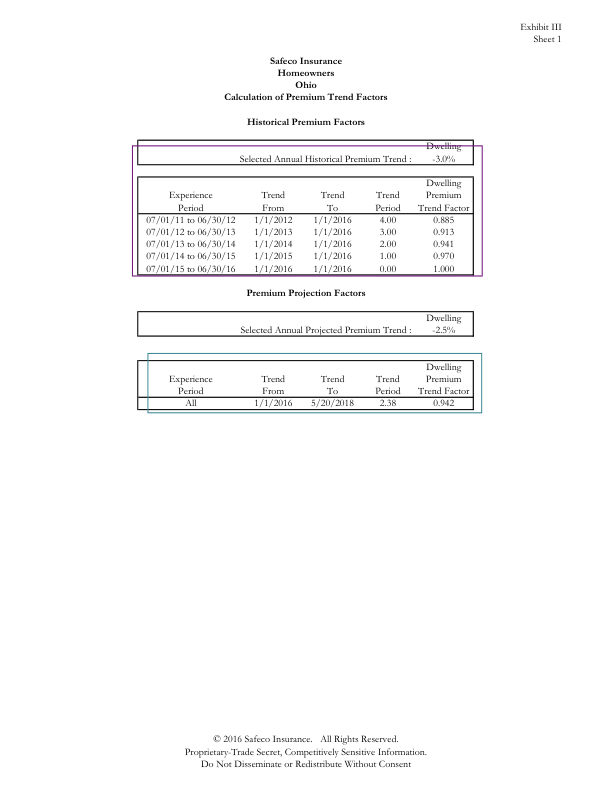

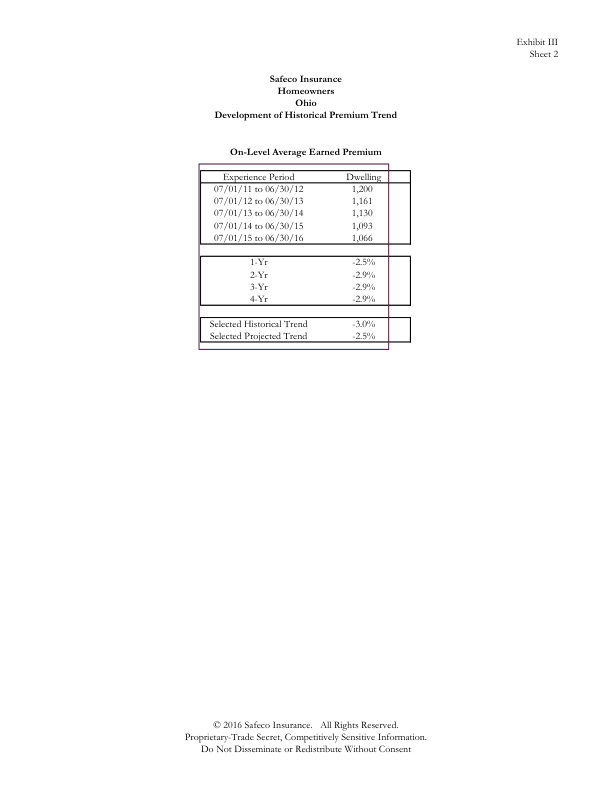

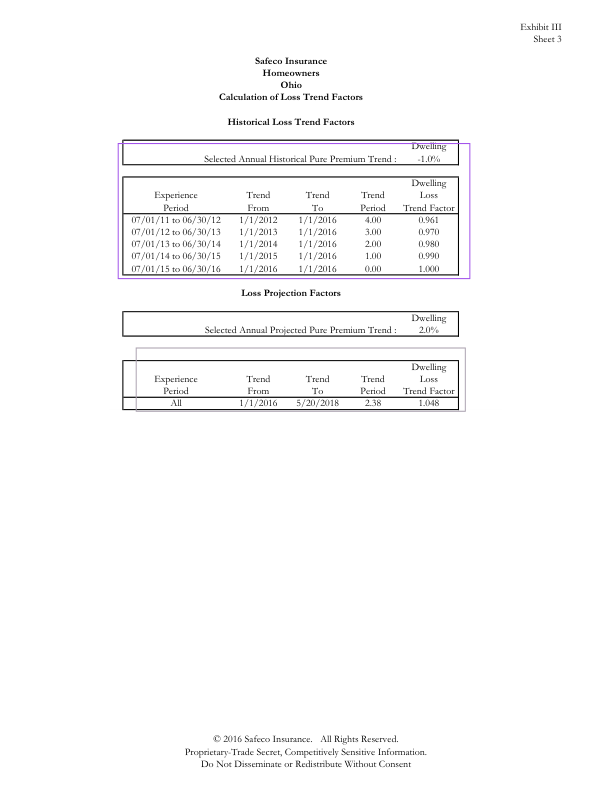

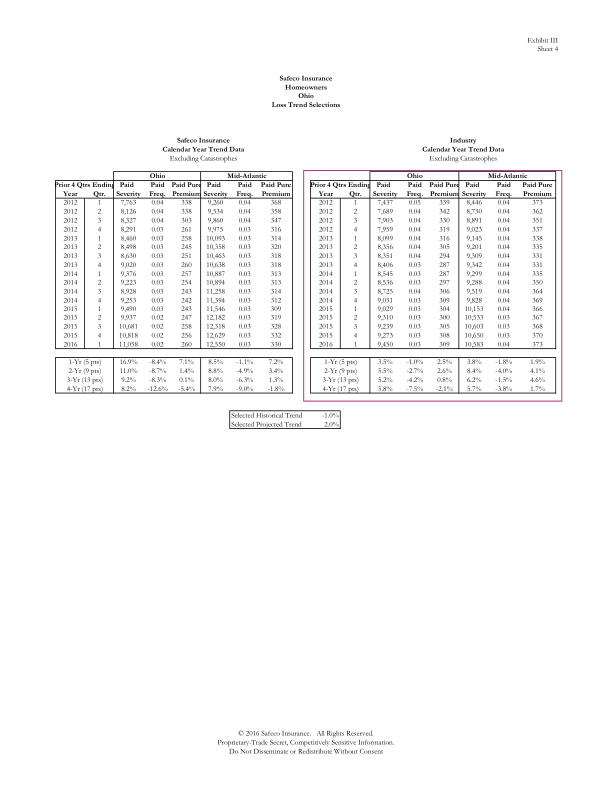

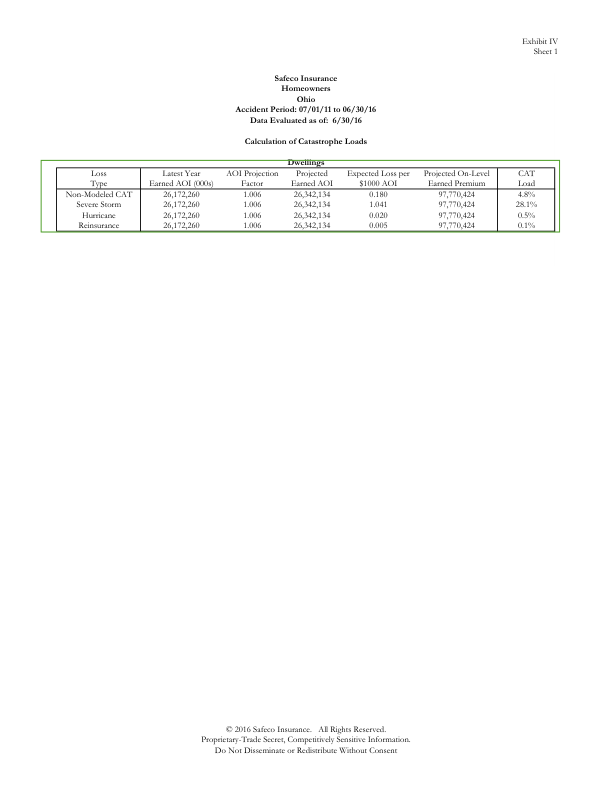

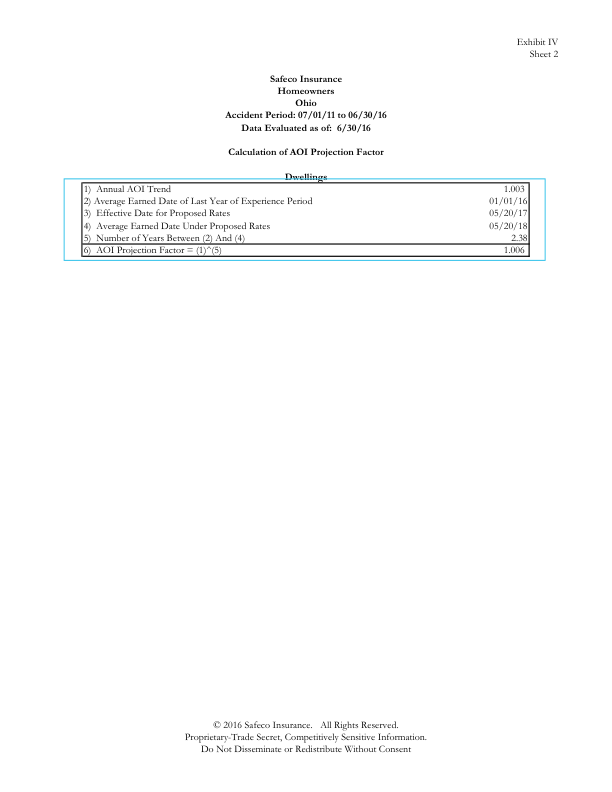

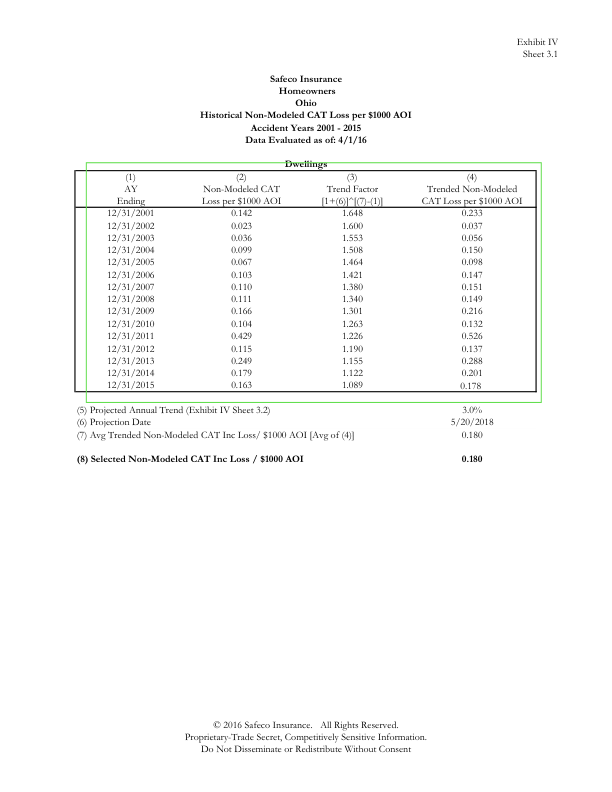

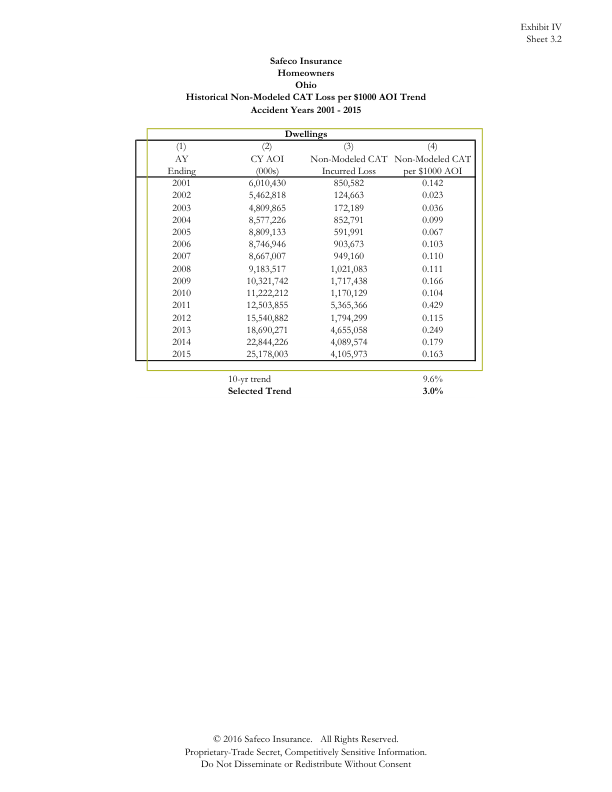

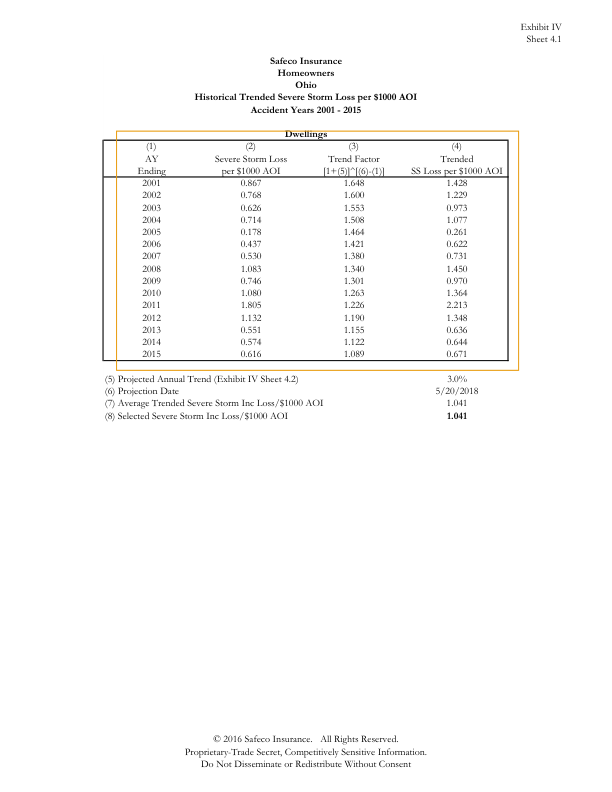

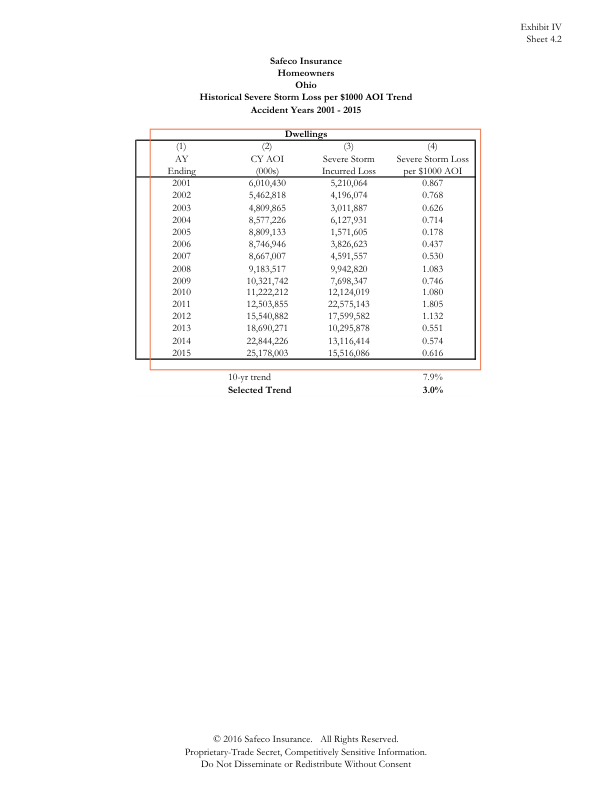

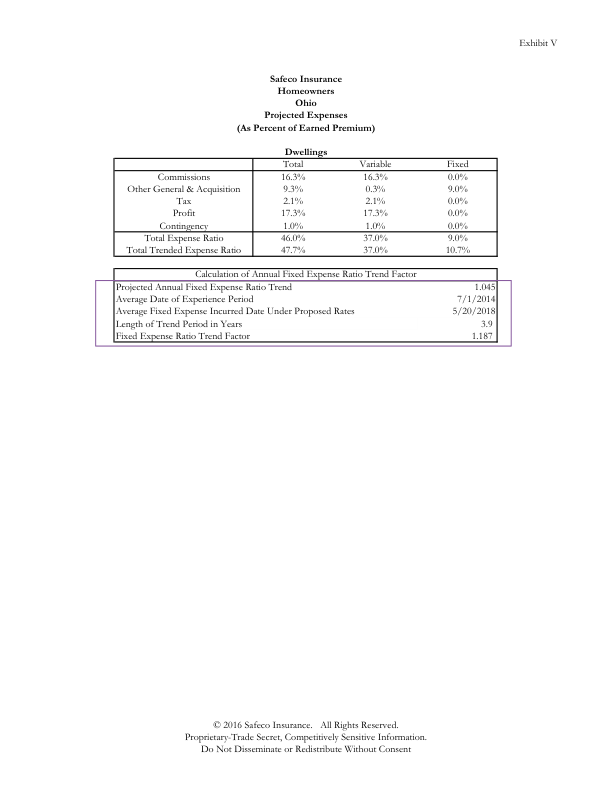

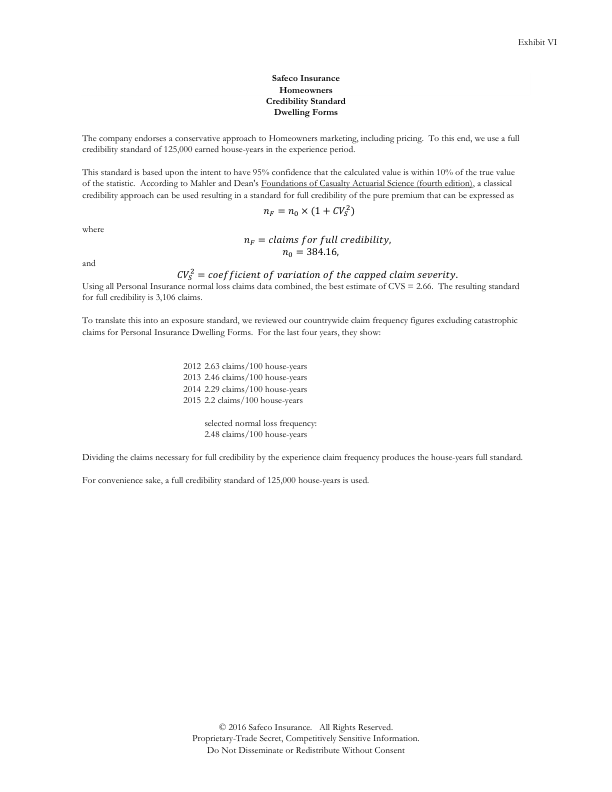

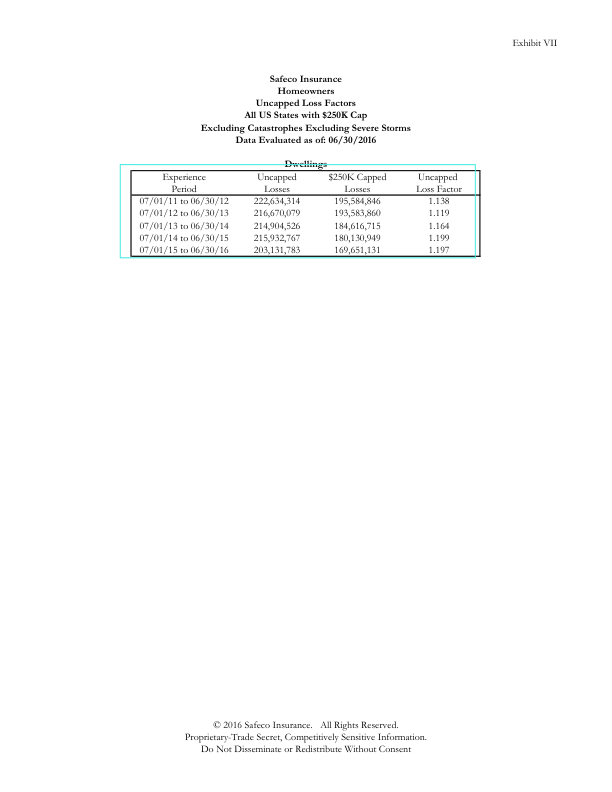

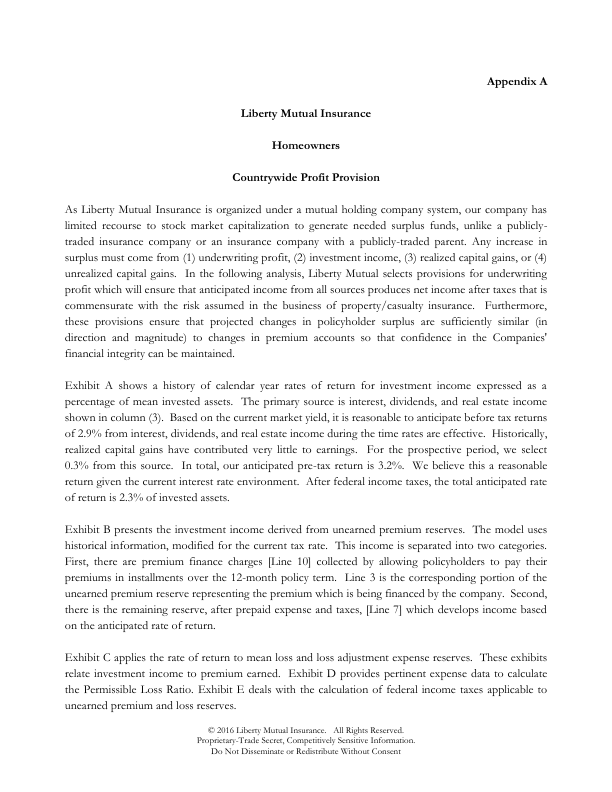

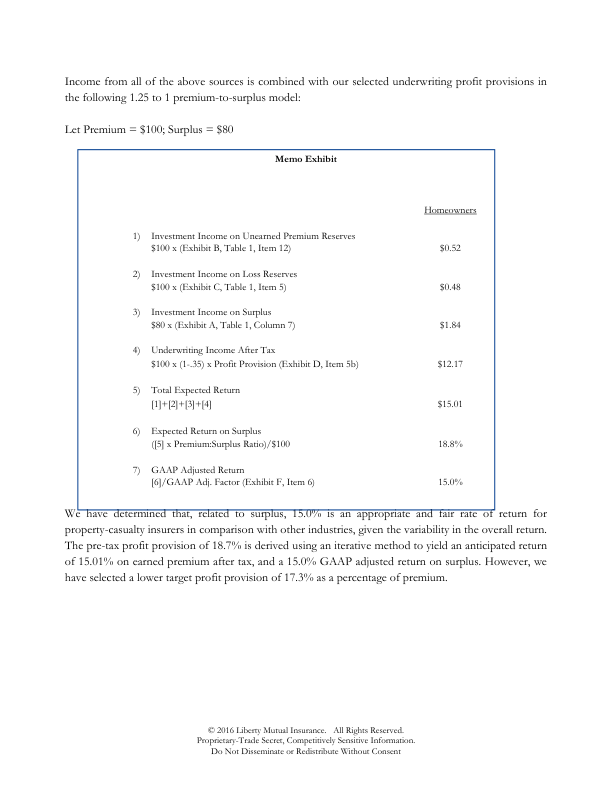

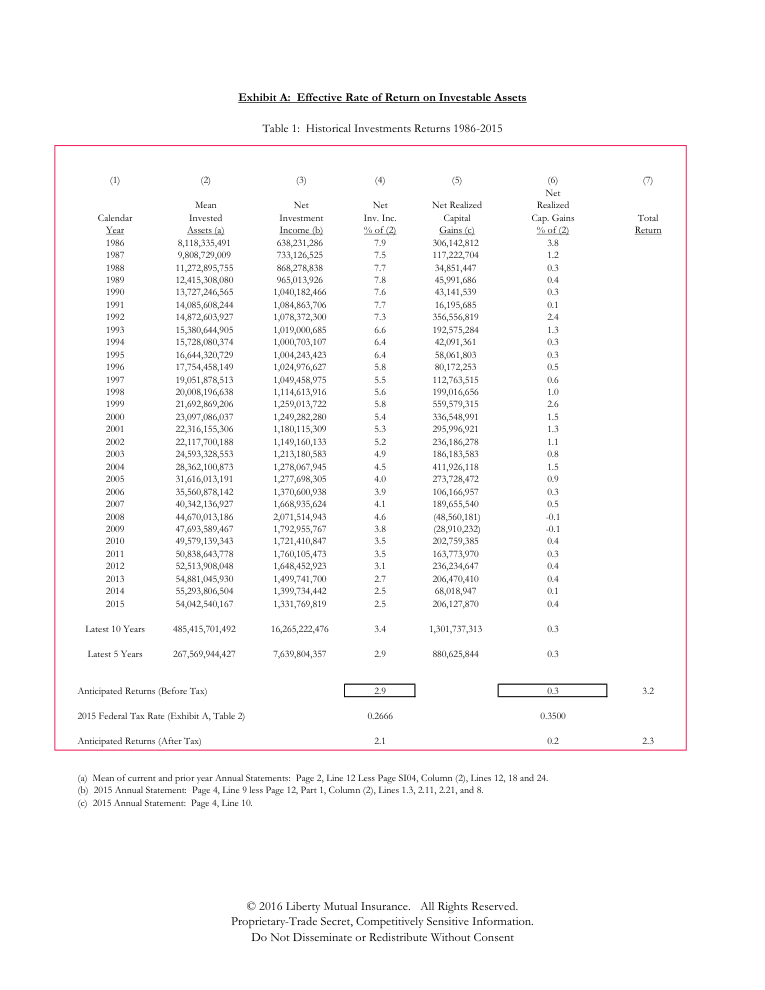

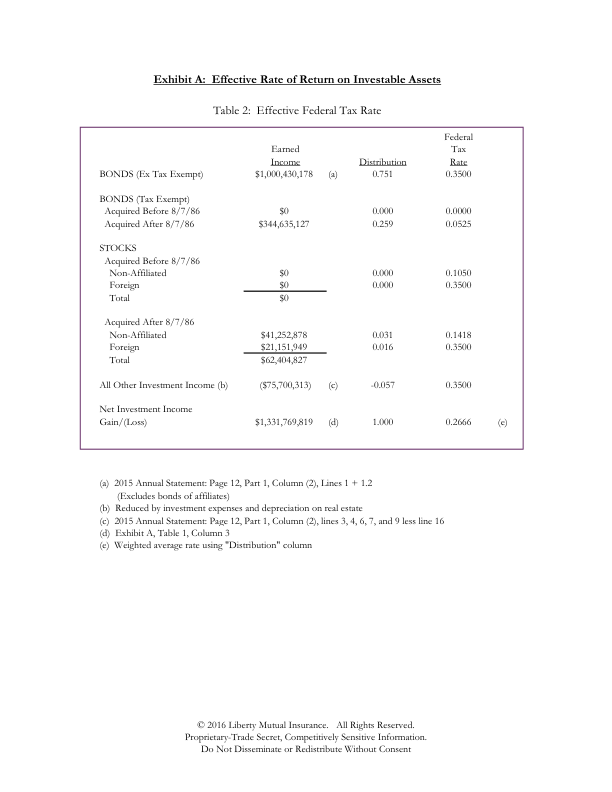

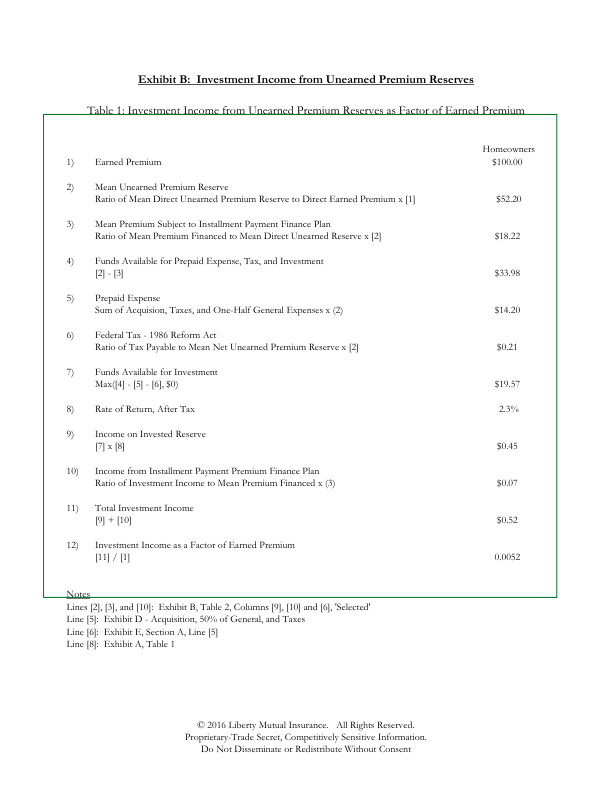

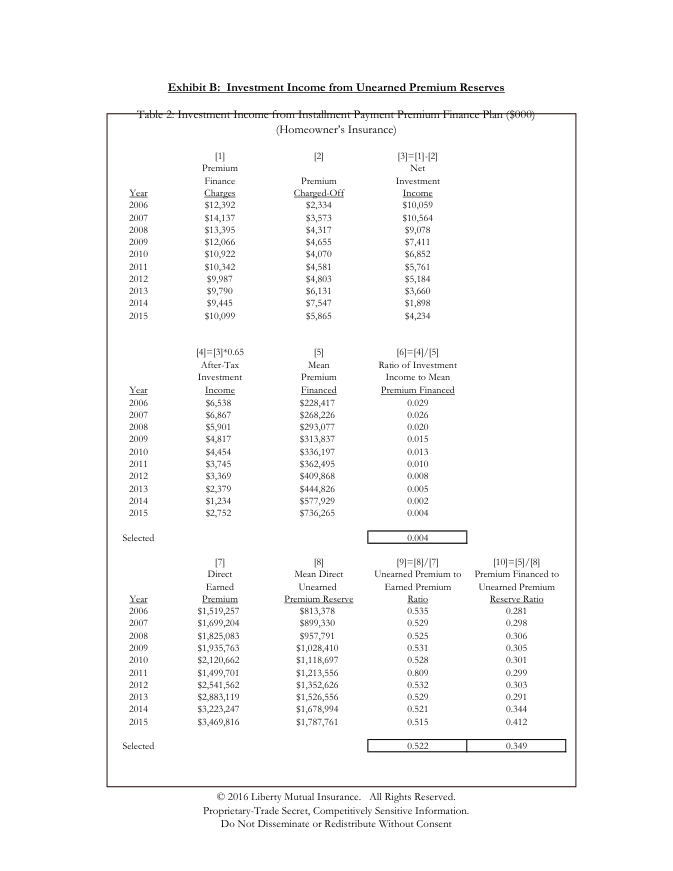

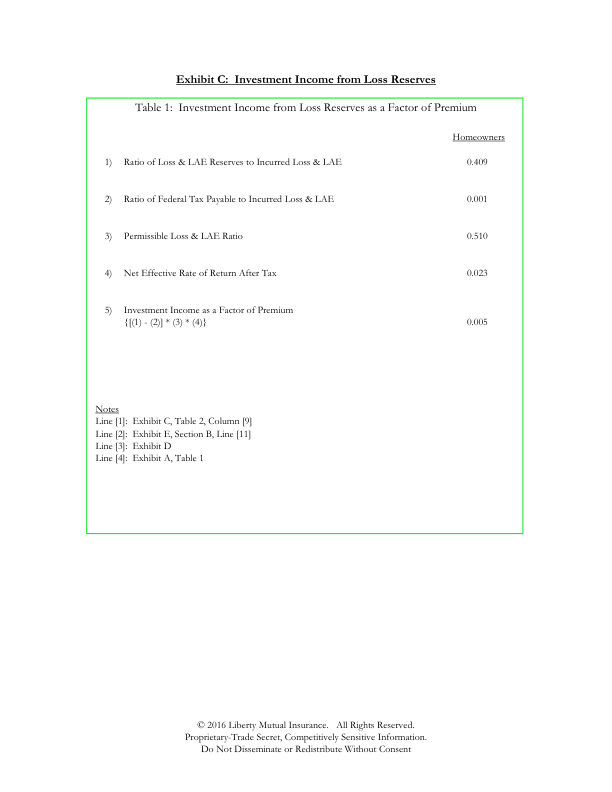

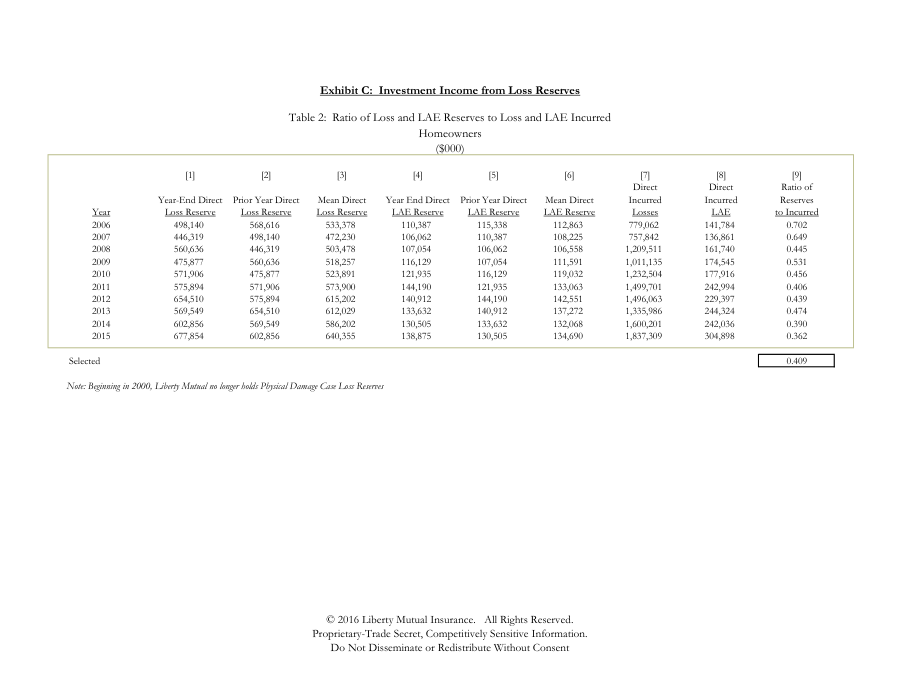

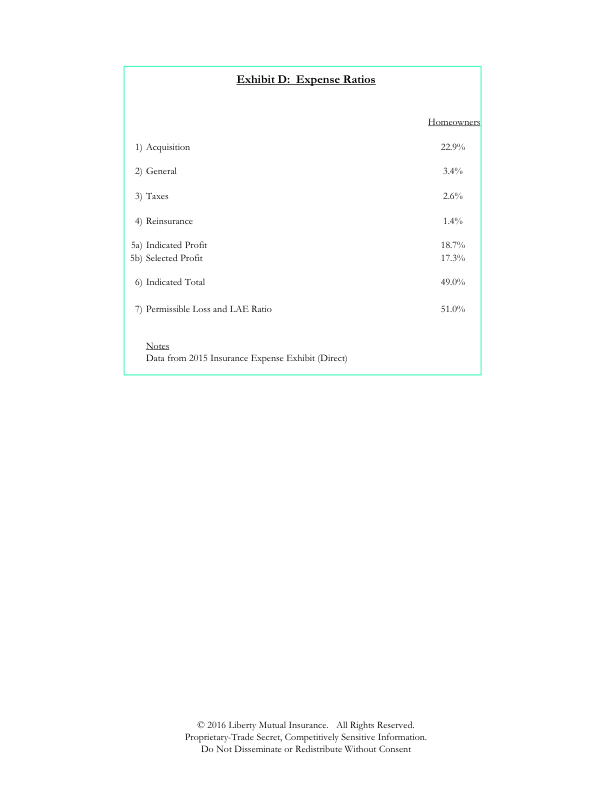

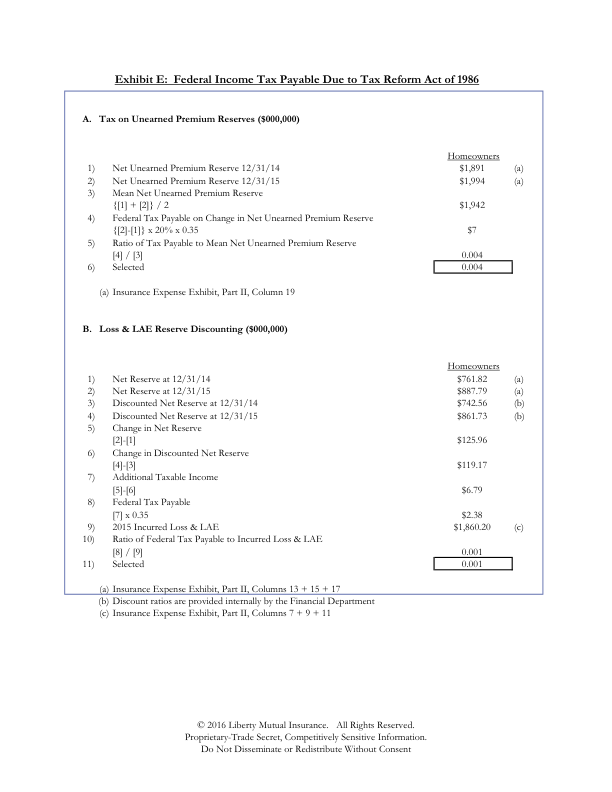

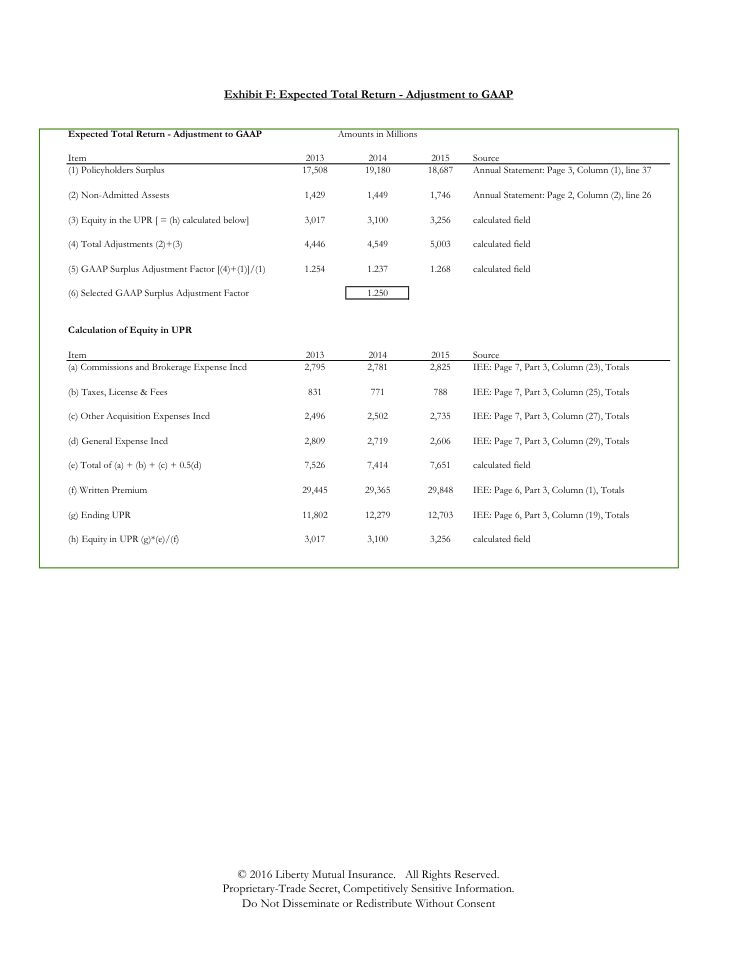

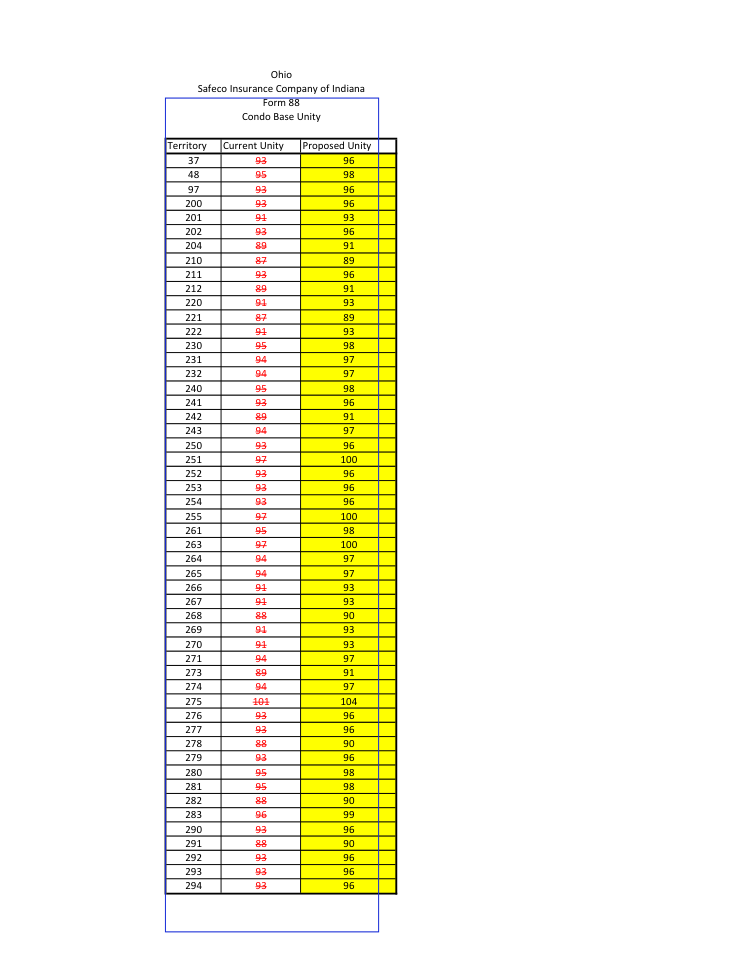

In [3]:
import sys
from pathlib import Path

sys.path.append("..")

import openparse

pdfs_with_tables_dir = Path("../evals/data/tables")

for pdf_path in pdfs_with_tables_dir.glob("*"):
    parser = openparse.DocumentParser(
        table_args={
            "parsing_algorithm": "unitable",
            "min_table_confidence": 0.8,
        },
        processing_pipeline=None,
    )
    parsed_nodes = parser.parse(pdf_path)
    table_nodes = [node for node in parsed_nodes.nodes if "table" in node.variant]

    if not table_nodes:
        print(f"Could not find tables on {pdf_path}")
        continue

    doc = openparse.Pdf(file=pdf_path)
    doc.display_with_bboxes(table_nodes)